# Nave Bye's Project

In [1]:
# import libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# import dataset

dataset = pd.read_csv('Weather_1000.csv')

In [3]:
dataset.head()

,Outlook,Temperature,Humidity,Windy,Play
0,Sunny,Mild,High,True,No
1,Rain,Cool,Normal,True,No
2,Rain,Mild,Normal,False,Yes
3,Sunny,Cool,High,False,No
4,Overcast,Hot,Normal,False,Yes


In [4]:
dataset.isnull().sum()

Outlook        0
Temperature    0
Humidity       0
Windy          0
Play           0
dtype: int64

In [6]:
dataset.columns

Index(['Outlook', 'Temperature', 'Humidity', 'Windy', 'Play'], dtype='object')

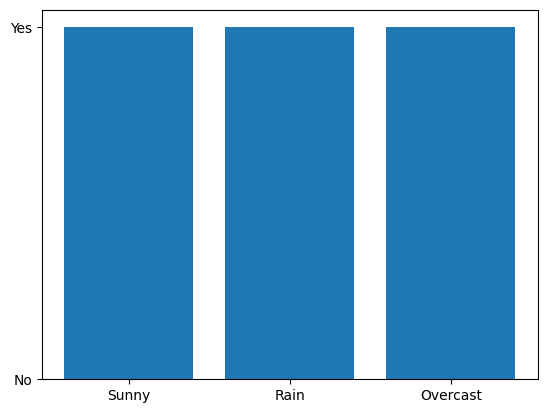

In [14]:
plt.bar(dataset['Outlook'], dataset['Play'])
plt.show()

In [17]:
X = dataset[['Outlook', 'Temperature', 'Humidity', 'Windy']]

Y = dataset['Play']

In [15]:
# train test split

from sklearn.model_selection import train_test_split

In [18]:
X_train, X_test , Y_train, Y_test =  train_test_split(X,Y, test_size=0.30, random_state=42)

In [19]:
X_train

,Outlook,Temperature,Humidity,Windy
541,Overcast,Hot,Normal,False
440,Overcast,Cool,High,True
482,Overcast,Cool,High,True
422,Sunny,Cool,Normal,False
778,Sunny,Mild,Normal,True
...,...,...,...,...
106,Rain,Cool,High,False
270,Sunny,Mild,High,True
860,Sunny,Mild,Normal,True
435,Sunny,Mild,High,False


In [20]:
Y_train

541    Yes
440    Yes
482    Yes
422    Yes
778    Yes
      ... 
106    Yes
270     No
860    Yes
435     No
102     No
Name: Play, Length: 700, dtype: object

In [22]:
dataset['Outlook'].value_counts()

Outlook
Rain        342
Sunny       331
Overcast    327
Name: count, dtype: int64

In [23]:
from sklearn.preprocessing import LabelEncoder

leb = LabelEncoder()

In [24]:
for col in dataset.columns:
    dataset[col] = leb.fit_transform(dataset[col])

In [25]:
dataset.head()

,Outlook,Temperature,Humidity,Windy,Play
0,2,2,0,1,0
1,1,0,1,1,0
2,1,2,1,0,1
3,2,0,0,0,0
4,0,1,1,0,1


In [26]:
from sklearn.naive_bayes import GaussianNB

In [27]:
gnb = GaussianNB()

In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Outlook      1000 non-null   int64
 1   Temperature  1000 non-null   int64
 2   Humidity     1000 non-null   int64
 3   Windy        1000 non-null   int64
 4   Play         1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB


In [32]:
X = dataset[['Outlook', 'Temperature', 'Humidity', 'Windy']]

Y = dataset['Play']

In [33]:
X_train, X_test , Y_train, Y_test =  train_test_split(X,Y, test_size=0.30, random_state=42)

In [34]:
X_train

,Outlook,Temperature,Humidity,Windy
541,0,1,1,0
440,0,0,0,1
482,0,0,0,1
422,2,0,1,0
778,2,2,1,1
...,...,...,...,...
106,1,0,0,0
270,2,2,0,1
860,2,2,1,1
435,2,2,0,0


In [35]:
gnb.fit(X_train, Y_train)

,priors,None
,var_smoothing,1e-09


In [36]:
y_pred = gnb.predict(X_test)

In [37]:
from sklearn.metrics import accuracy_score,classification_report, confusion_matrix

In [38]:
print(accuracy_score(y_pred, Y_test))
print(confusion_matrix(y_pred, Y_test))
print(classification_report(y_pred, Y_test))

0.7433333333333333
[[ 47  22]
 [ 55 176]]
              precision    recall  f1-score   support

           0       0.46      0.68      0.55        69
           1       0.89      0.76      0.82       231

    accuracy                           0.74       300
   macro avg       0.67      0.72      0.69       300
weighted avg       0.79      0.74      0.76       300



In [39]:
import pickle

pickle.dump(leb, open('LabelEncoder.pkl', 'wb'))
pickle.dump(gnb, open('GaussianNB.pkl', 'wb'))

In [40]:
# Outlook
le_outlook = LabelEncoder()
dataset['Outlook'] = le_outlook.fit_transform(dataset['Outlook'])
pickle.dump(le_outlook, open('le_outlook.pkl', 'wb'))

# Temperature
le_temp = LabelEncoder()
dataset['Temperature'] = le_temp.fit_transform(dataset['Temperature'])
pickle.dump(le_temp, open('le_temp.pkl', 'wb'))

# Humidity
le_humidity = LabelEncoder()
dataset['Humidity'] = le_humidity.fit_transform(dataset['Humidity'])
pickle.dump(le_humidity, open('le_humidity.pkl', 'wb'))

# Windy
le_windy = LabelEncoder()
dataset['Windy'] = le_windy.fit_transform(dataset['Windy'])
pickle.dump(le_windy, open('le_windy.pkl', 'wb'))
